# WeatherPy
----


In [ ]:
#!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create base URL for open weather map API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

name_city = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through all cities in cities list.
for city in cities:
    
    # Try statement to append calls where values are found.
    try:
        response = requests.get(f'{base_url}&q={city}').json()
        name_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
        print(f'Processing Record {record} | {city}')
        
        # Increase record counter.
        record += 1
        
        # Do not exceed API call limit.
        time.sleep(1.01)
        
    # If no record found for city, then skip.
    except:
        print('City not found. Skipping...')
    continue

Beginning Data Retrieval
-------------------------
Processing Record 1 | qaanaaq
Processing Record 2 | albany
Processing Record 3 | carnarvon
Processing Record 4 | port alfred
Processing Record 5 | new norfolk
Processing Record 6 | kapaa
Processing Record 7 | bathsheba
Processing Record 8 | mizan teferi
City not found. Skipping...
Processing Record 9 | egvekinot
Processing Record 10 | pizhma
Processing Record 11 | padang
Processing Record 12 | severo-yeniseyskiy
Processing Record 13 | salalah
Processing Record 14 | obihiro
Processing Record 15 | saint anthony
Processing Record 16 | polunochnoye
Processing Record 17 | rikitea
Processing Record 18 | pacific grove
Processing Record 19 | te anau
Processing Record 20 | san ignacio
Processing Record 21 | sur
Processing Record 22 | zhigansk
Processing Record 23 | torbay
Processing Record 24 | wukari
Processing Record 25 | tuktoyaktuk
City not found. Skipping...
Processing Record 26 | basco
Processing Record 27 | hobart
Processing Record 28 | 

Processing Record 226 | chuy
Processing Record 227 | kropotkin
Processing Record 228 | kichera
Processing Record 229 | inhambane
Processing Record 230 | gushikawa
Processing Record 231 | olenino
Processing Record 232 | baruun-urt
Processing Record 233 | nanortalik
City not found. Skipping...
Processing Record 234 | domingos martins
Processing Record 235 | codrington
Processing Record 236 | valenca do piaui
Processing Record 237 | luang prabang
City not found. Skipping...
City not found. Skipping...
Processing Record 238 | cam ranh
Processing Record 239 | guerrero negro
Processing Record 240 | palmares do sul
Processing Record 241 | dapaong
Processing Record 242 | evensk
Processing Record 243 | nome
Processing Record 244 | sorland
Processing Record 245 | upington
Processing Record 246 | verkhoyansk
Processing Record 247 | kushiro
Processing Record 248 | tommot
Processing Record 249 | warri
Processing Record 250 | fort nelson
Processing Record 251 | morozovsk
Processing Record 252 | ostr

Processing Record 457 | san felipe
Processing Record 458 | yenagoa
Processing Record 459 | maltahohe
Processing Record 460 | bambous virieux
Processing Record 461 | juba
Processing Record 462 | rundu
Processing Record 463 | zhanakorgan
Processing Record 464 | aksarka
Processing Record 465 | souillac
Processing Record 466 | magistralnyy
Processing Record 467 | hun
Processing Record 468 | carutapera
Processing Record 469 | flinders
Processing Record 470 | lakatoro
Processing Record 471 | kalmunai
City not found. Skipping...
Processing Record 472 | shasta lake
Processing Record 473 | muyezerskiy
Processing Record 474 | iskateley
Processing Record 475 | batagay
Processing Record 476 | tyret pervaya
City not found. Skipping...
Processing Record 477 | itaituba
Processing Record 478 | margate
City not found. Skipping...
Processing Record 479 | praia da vitoria
City not found. Skipping...
Processing Record 480 | bielsk podlaski
Processing Record 481 | omboue
Processing Record 482 | sisimiut
Pr

### Convert Raw Data to DataFrame

In [7]:
# Create values dictionary from API call lists.
weatherdata = {
    'City': name_city,
    'Cloudiness': clouds,
    'Country': countries,
    'Date': dates,
    'Humidity': humidities,
    'Lat': lats,
    'Lng': lngs,
    'Max Temperature': max_temps,
    'Wind Speed': wind_speeds
}

# Create new DF for values in dictionary.
df_weather = pd.DataFrame(weatherdata)

# Display count of weather values per column.
df_weather.count()

City               561
Cloudiness         561
Country            561
Date               561
Humidity           561
Lat                561
Lng                561
Max Temperature    561
Wind Speed         561
dtype: int64

In [8]:
# Save csv file.
df_weather.to_csv('weather_data.csv')

### Plotting the Data

#### Latitude vs. Temperature Plot

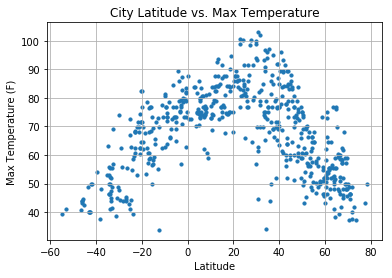

In [11]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(df_weather['Lat'], df_weather['Max Temperature'], marker='o', s=10)

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Max_Temp_vs_Lat.png')

plt.show()


#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot